<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,87.480103,44.802076,-0.002484,142.279695,142.279063,0.000632
1,0.0,1.0,41.360286,99.872322,0.000014,151.232622,151.235334,-0.002712
2,0.0,2.0,94.030808,66.047200,-0.001778,170.076229,170.074908,0.001322
3,0.0,3.0,90.374149,61.238535,-0.002618,161.610067,161.609781,0.000286
4,0.0,4.0,21.905467,31.512245,0.017691,63.435403,63.420240,0.015163
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.253624,57.488573,0.000860,105.743057,105.742960,0.000098
19996,999.0,16.0,93.562407,78.400071,0.001038,181.963516,181.964483,-0.000967
19997,999.0,17.0,75.626869,42.976809,-0.001613,128.602064,128.604889,-0.002825
19998,999.0,18.0,37.921432,39.395349,-0.001875,87.314907,87.317292,-0.002385


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    87.480103  44.802076 -0.002484  142.279695  142.279063  0.000632
      1.0    41.360286  99.872322  0.000014  151.232622  151.235334 -0.002712
      2.0    94.030808  66.047200 -0.001778  170.076229  170.074908  0.001322
      3.0    90.374149  61.238535 -0.002618  161.610067  161.609781  0.000286
      4.0    21.905467  31.512245  0.017691   63.435403   63.420240  0.015163
...                ...        ...       ...         ...         ...       ...
999.0 15.0   38.253624  57.488573  0.000860  105.743057  105.742960  0.000098
      16.0   93.562407  78.400071  0.001038  181.963516  181.964483 -0.000967
      17.0   75.626869  42.976809 -0.001613  128.602064  128.604889 -0.002825
      18.0   37.921432  39.395349 -0.001875   87.314907   87.317292 -0.002385
      19.0   44.599910  50.657689  0.001857  105.259456  105.258379  0.001077

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    87.480103  44.802076 -0.002484  142.279695  142.279063  0.000632
      1.0    41.360286  99.872322  0.000014  151.232622  151.235334 -0.002712
      2.0    94.030808  66.047200 -0.001778  170.076229  170.074908  0.001322
      3.0    90.374149  61.238535 -0.002618  161.610067  161.609781  0.000286
      4.0    21.905467  31.512245  0.017691   63.435403   63.420240  0.015163
...                ...        ...       ...         ...         ...       ...
999.0 15.0   38.253624  57.488573  0.000860  105.743057  105.742960  0.000098
      16.0   93.562407  78.400071  0.001038  181.963516  181.964483 -0.000967
      17.0   75.626869  42.976809 -0.001613  128.602064  128.604889 -0.002825
      18.0   37.921432  39.395349 -0.001875   87.314907   87.317292 -0.002385
      19.0   44.599910  50.657689  0.001857  105.259456  105.258379  0.001077

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,87.480103,44.802076,-0.002484,142.279695,142.279063,0.000632
1,0.0,1.0,41.360286,99.872322,0.000014,151.232622,151.235334,-0.002712
2,0.0,2.0,94.030808,66.047200,-0.001778,170.076229,170.074908,0.001322
3,0.0,3.0,90.374149,61.238535,-0.002618,161.610067,161.609781,0.000286
4,0.0,4.0,21.905467,31.512245,0.017691,63.435403,63.420240,0.015163
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.253624,57.488573,0.000860,105.743057,105.742960,0.000098
19996,999.0,16.0,93.562407,78.400071,0.001038,181.963516,181.964483,-0.000967
19997,999.0,17.0,75.626869,42.976809,-0.001613,128.602064,128.604889,-0.002825
19998,999.0,18.0,37.921432,39.395349,-0.001875,87.314907,87.317292,-0.002385


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    87.480103  44.802076 -0.002484  142.279695  142.279063  0.000632
      1.0    41.360286  99.872322  0.000014  151.232622  151.235334 -0.002712
      2.0    94.030808  66.047200 -0.001778  170.076229  170.074908  0.001322
      3.0    90.374149  61.238535 -0.002618  161.610067  161.609781  0.000286
      4.0    21.905467  31.512245  0.017691   63.435403   63.420240  0.015163
...                ...        ...       ...         ...         ...       ...
999.0 15.0   38.253624  57.488573  0.000860  105.743057  105.742960  0.000098
      16.0   93.562407  78.400071  0.001038  181.963516  181.964483 -0.000967
      17.0   75.626869  42.976809 -0.001613  128.602064  128.604889 -0.002825
      18.0   37.921432  39.395349 -0.001875   87.314907   87.317292 -0.002385
      19.0   44.599910  50.657689  0.001857  105.259456  105.258379  0.001077

[20000 rows x 6 columns]

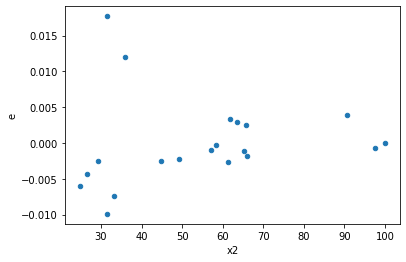

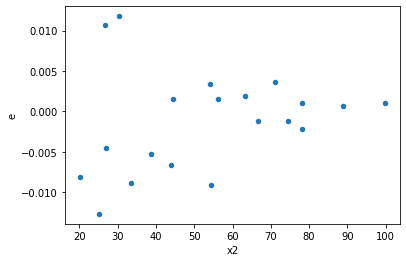

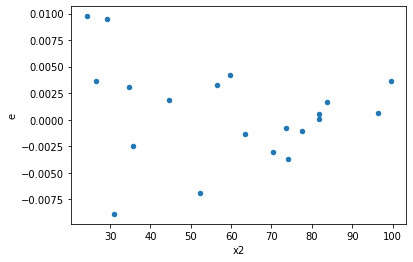

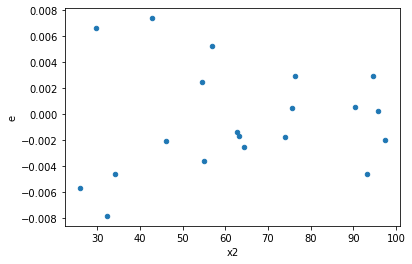

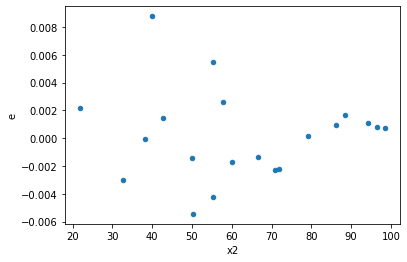

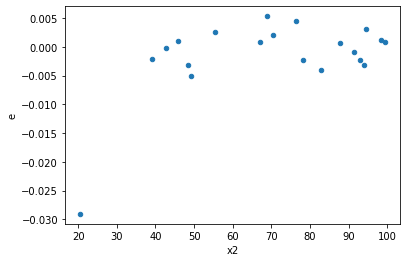

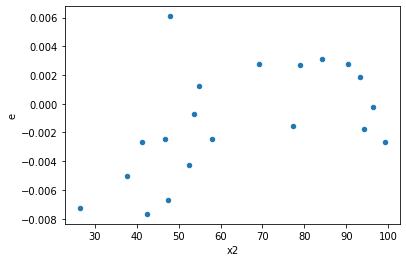

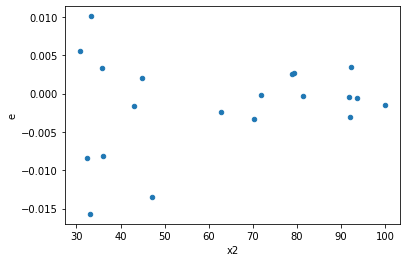

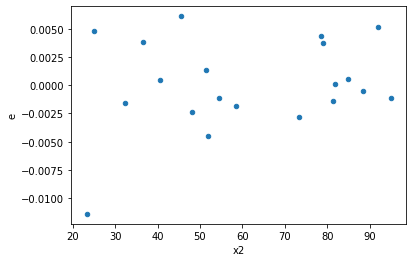

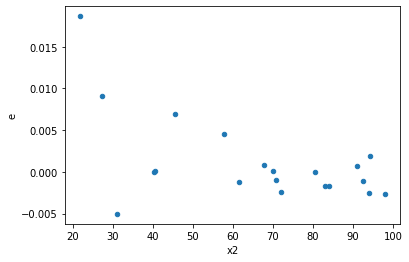

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,3.320119792873695e-05,0.0005089783076019124,4.1501497410921184e-06,6.362228845023904e-05,15.330118771448651,0.0008469183196468943,0.9995765408401766,0.0004234591598234472,Reject001=0 : Heteroscedasticity
1.0,10.0,6.0,0.0002588169057468716,0.00032667794496001897,2.5881690574687158e-05,5.444632416000316e-05,2.1036618146286323,0.37542455215245374,0.8122877239237731,0.18771227607622687,Reject001=1 : Homoscedasticity
5.0,13.0,3.0,0.0001366926439651081,0.00013720313801528737,1.0514818766546776e-05,4.5734379338429124e-05,4.34951665395646,0.25217988136164804,0.873910059319176,0.12608994068082402,Reject001=1 : Homoscedasticity
6.0,4.0,12.0,5.81456119854784e-06,0.00013098164484017465,1.45364029963696e-06,1.0915137070014554e-05,7.508829435136436,0.005723391781219833,0.9971383041093901,0.0028616958906099166,Reject001=0 : Heteroscedasticity
8.0,10.0,6.0,4.761530967232029e-05,0.00013810247654863652,4.761530967232029e-06,2.301707942477275e-05,4.8339661304677035,0.06690626488388429,0.9665468675580579,0.033453132441942146,Reject001=1 : Homoscedasticity
10.0,10.0,6.0,0.0002494479463843624,0.00025991114491274905,2.494479463843624e-05,4.331852415212484e-05,1.7365756976558708,0.5156119089629947,0.7421940455185027,0.25780595448149735,Reject001=1 : Homoscedasticity
11.0,11.0,5.0,8.318265952855028e-05,0.0002316019651712234,7.562059957140935e-06,4.632039303424468e-05,6.1253670688638,0.057990007966898016,0.971004996016551,0.028995003983449008,Reject001=1 : Homoscedasticity
12.0,6.0,10.0,1.3068366489885171e-05,0.0002738607178150058,2.1780610816475284e-06,2.738607178150058e-05,12.57360136143896,0.0007514676155815359,0.9996242661922092,0.0003757338077907679,Reject001=0 : Heteroscedasticity
14.0,9.0,7.0,4.64118013663854e-05,0.0001253564500548898,5.156866818487267e-06,1.7908064293555687e-05,3.472663716921218,0.11482562526395479,0.9425871873680226,0.057412812631977395,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,3.320119792873695e-05,0.0005089783076019124,4.1501497410921184e-06,6.362228845023904e-05,15.330118771448651,0.0008469183196468943,Reject001=0 : Heteroscedasticity
1.0,10.0,6.0,0.0002588169057468716,0.00032667794496001897,2.5881690574687158e-05,5.444632416000316e-05,2.1036618146286323,0.37542455215245374,Reject001=1 : Homoscedasticity
2.0,10.0,6.0,0.000231078383039229,7.760401893178882e-05,2.3107838303922902e-05,1.2934003155298136e-05,0.559723630795114,0.3981466052986972,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,0.0002244196996073828,5.799265896221514e-05,2.805246245092285e-05,7.2490823702768925e-06,0.25841162368398135,0.0730067118060092,Reject001=1 : Homoscedasticity
4.0,7.0,9.0,9.287023813073137e-05,7.152811813650073e-05,1.3267176875818767e-05,7.947568681833414e-06,0.5990399281039915,0.5118553663616247,Reject001=1 : Homoscedasticity
5.0,13.0,3.0,0.0001366926439651081,0.00013720313801528737,1.0514818766546776e-05,4.5734379338429124e-05,4.34951665395646,0.25217988136164804,Reject001=1 : Homoscedasticity
6.0,4.0,12.0,5.81456119854784e-06,0.00013098164484017465,1.45364029963696e-06,1.0915137070014554e-05,7.508829435136436,0.005723391781219833,Reject001=0 : Heteroscedasticity
7.0,11.0,5.0,0.0006578720933834895,2.8138941948504575e-05,5.980655394395359e-05,5.627788389700915e-06,0.09409986061017452,0.0012799883819313578,Reject001=0 : Heteroscedasticity
8.0,10.0,6.0,4.761530967232029e-05,0.00013810247654863652,4.761530967232029e-06,2.301707942477275e-05,4.8339661304677035,0.06690626488388429,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      639
Reject001=0 : Heteroscedasticity    361
Name: Result_test, dtype: int64